In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from scipy.linalg import null_space

In [2]:
#Generate Data
iris = sklearn.datasets.load_iris()
iris_data = iris.data - iris.data.mean(axis=0)
iris_data.shape

(150, 4)

In [50]:
# we have 4 variables with each having 150 observations 
# the above will give a k by k, sample covareince matrix 
# from scartch and barely vectorized not optimized nor libraries used
def Covariance_m(matrix):
    size = matrix.shape[1]
    Sample_covariance_m = np.zeros((size, size))
    means = np.mean(matrix, axis=0)
    centered_data = matrix - means
    for j in range(len(Sample_covariance_m)):
        for k in range(len(Sample_covariance_m)):
            Sample_covariance_m[j , k] = np.sum(centered_data[:,j] * centered_data[:,k]) / (matrix.shape[0] -1)
    return Sample_covariance_m

def proj(b, a):
    mul = ((np.dot(a, b)) / (np.dot(b, b)))
    return mul * b

def QR_factor(matrix):

    size = len(matrix)
    Q, R , u = np.zeros((size, size)), np.zeros((size, size)), np.zeros((size, size))

    for k in range(size):
        if k != 0:
            final_sum = 0
            for j in range(k):
                initial_sum = proj(u[j], matrix[:,k])
                final_sum += initial_sum
            u[k] = matrix[:, k] - final_sum

        else:
            u[k] = matrix[:,0]
            
    for index in range(size):
        e_i = u[index] / np.linalg.norm(u[index])
        Q[:,index] = e_i

    for i in range(size):
        for j in range(i , size):
            R[i, j] = np.dot(Q[:,i], matrix[:,j])
    return Q , R

def QR_alg(A_0, max_iter=1000):

    Q, R = QR_factor(A_0)
    for _ in range(max_iter):
        A_0 = np.dot(R, Q)
        Q, R = QR_factor(A_0)
    return A_0

def sorted_eigenvalues(matrix):
    eigen = QR_alg(matrix)
    eigenvalues = []
    for i in range(len(eigen)):
        for j in range(i, len(eigen)):
            if i == j:
                eigenvalues.append(eigen[i, j])
    return sorted(eigenvalues, reverse=True)

def sorted_eigenvectors(matrix):
    size = len(matrix)
    eigenvectors = np.zeros((size, size))
    eigenvalues_list = sorted_eigenvalues(matrix)

    for index, eigenvalue in enumerate(eigenvalues_list):

        A = matrix - eigenvalue * np.identity(size, dtype=None, like=None)
        eigenvector = null_space(A)
        eigenvectors[:, index] = eigenvector.T / np.linalg.norm(eigenvector)
    return eigenvectors

def PCA(Data, axes):
    centered_data = Data - np.mean(Data, axis=0) 

    Covariance_matrix = Covariance_m(Data)

    sorted_eigenvectors_cov = sorted_eigenvectors(Covariance_matrix)[:, 0 : axes]
    projected_data = np.dot(centered_data,sorted_eigenvectors_cov)


    

    return projected_data




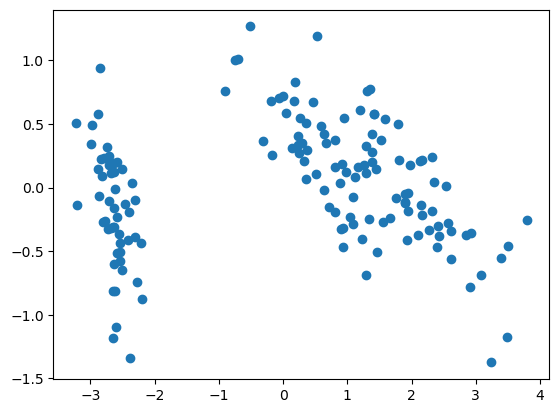

In [52]:
projected_data = PCA(iris_data, 2)
plt.scatter(projected_data[:, 0], projected_data[:, 1])